# AUTHOR:- R.SAI APURVA
# TASK-2:- Prediction using Unsupervised ML
## In this task,we were given an iris dataset,to predict the optimum number of clusters (using k-means unsupervised clustering method).

In [138]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import os #as you are importing a file from your personal system

In [139]:
pwd #check the present directory you are in to follow the appropriate syntax to read your file

'C:\\Users\\apurv'

In [140]:
##Import the data from given iris file
df=pd.read_csv(r"C:\Users\apurv\Downloads\Iris.csv")
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
df.info() #detialed information about the imported 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [142]:
#stratigical display of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [143]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [144]:
#to print no. of rows and columns in the dataset for better understanding
df.shape

(150, 5)

In [145]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## visualization distributions of data

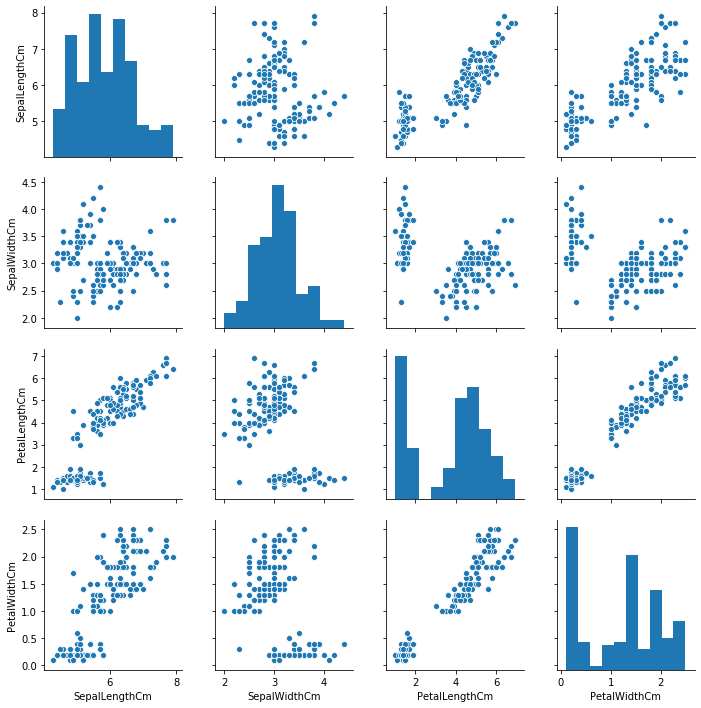

In [146]:
#build stratigical graphs for given data
x=df.drop('Species',axis = 1)
y=df['Species']
sns.pairplot(x)

## use elbow method to find the ideal clusters(number of clusters)

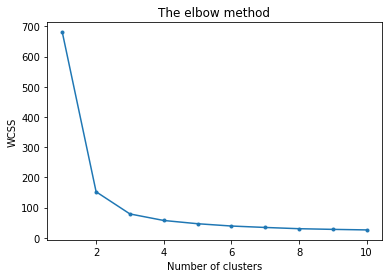

In [147]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = [] #within sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss,marker='.')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## From this we can choose number of clusters =3
## plot every graph with 3 clusters

In [148]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [149]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## now, compare our clusters with the original clusters

## 1.Sepal length vs Sepal width

Text(0.5, 1.0, 'Sepal length vs Sepal width')

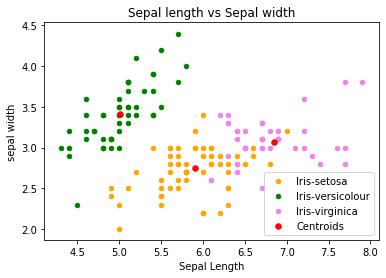

In [150]:
#predicted cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 20, c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('sepal width')
plt.title('Sepal length vs Sepal width')

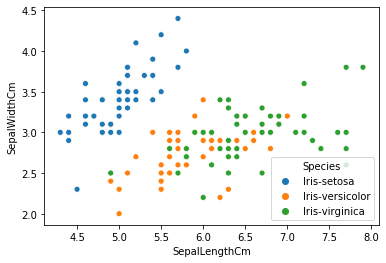

In [151]:
#original cluster
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])

## 2.Sepal length vs petal length

Text(0.5, 1.0, 'Sepal length vs petal length')

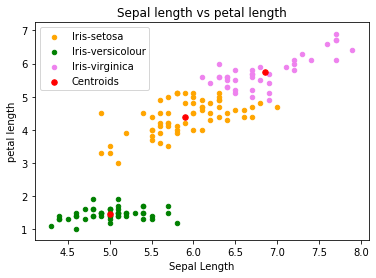

In [152]:
#predicted cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2],s=20, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2],s=20, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2],s=20, c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('petal length')
plt.title('Sepal length vs petal length')

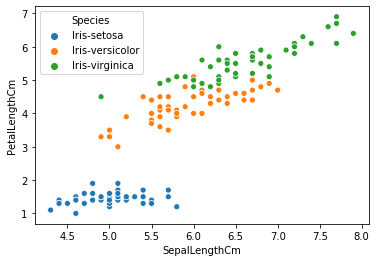

In [153]:
#original cluster
sns.scatterplot(df['SepalLengthCm'],df['PetalLengthCm'],hue=df['Species'])

## 3.Sepal length vs petal width

Text(0.5, 1.0, 'Sepal length vs petal width')

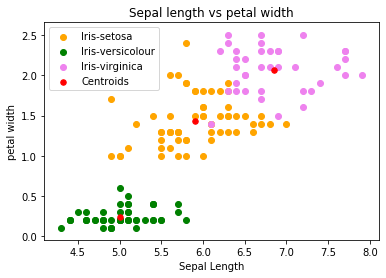

In [154]:
#predicted cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('petal width')
plt.title('Sepal length vs petal width')

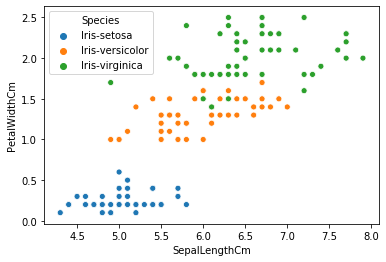

In [155]:
#original cluster
sns.scatterplot(df['SepalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

## 4.Sepal length vs petal width

Text(0.5, 1.0, 'Sepal length vs petal width')

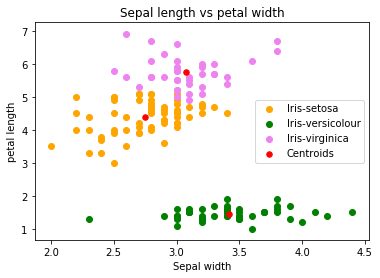

In [156]:
#predicted cluster
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal width')
plt.ylabel('petal length')
plt.title('Sepal length vs petal width')

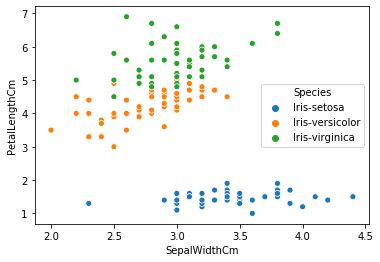

In [157]:
#original cluster
sns.scatterplot(df['SepalWidthCm'],df['PetalLengthCm'],hue=df['Species'])

## 5.Sepal width vs petal width

Text(0.5, 1.0, 'Sepal width vs petal width')

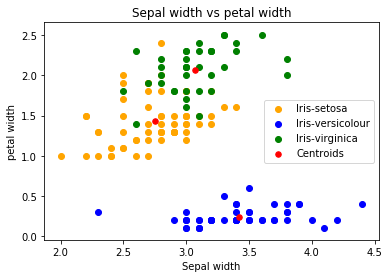

In [158]:
#predicted cluster
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 3], c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 3], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 3], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,3], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('Sepal width')
plt.ylabel('petal width')
plt.title('Sepal width vs petal width')

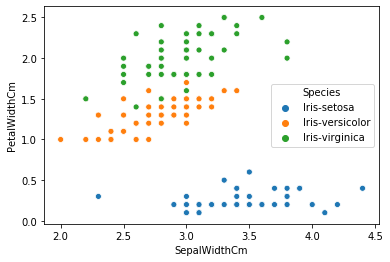

In [159]:
#original cluster
sns.scatterplot(df['SepalWidthCm'],df['PetalWidthCm'],hue=df['Species'])

## 6.petal length vs petal width

Text(0.5, 1.0, 'petal length vs petal width')

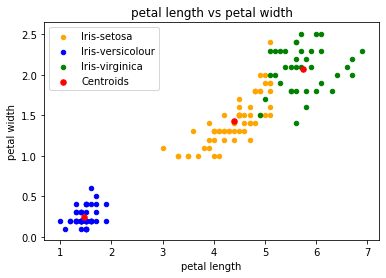

In [160]:
# predicted cluster
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],s=20, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],s=20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s=20,c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 30, c = 'red', label = 'Centroids')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal length vs petal width')

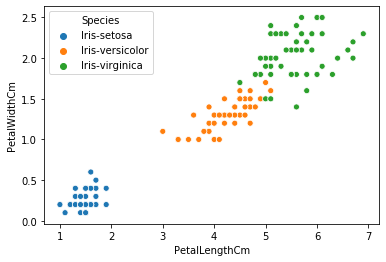

In [161]:
#original cluster
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

##### Conclusion:- The predictions made are pretty accurate and almost no diffrence can be seen in between the original clusters. Therefore, number of clusters are 3
#### I was successfully able to carry out the given task of predict the optimum number of clusters of the given iris data and represent it visually.
### THANK YOU.